In [124]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from numba import njit

plt.style.use(['science', 'grid', 'notebook'])

# Ejercicio 1

Aplicación de regla de oja, donde la regla de aprendizaje sigue:

$$ \Delta \omega_{j} = \eta V (X_j - V \omega_j)

In [131]:
sigma = np.array([[2,1,1,1],[1,2,1,1],[1,1,2,1],[1,1,1,2]]) # correlation matrix
sqrt_sigma = np.array([[1.309, 0.309, 0.309, 0.309], [0.309, 1.309, 0.309, 0.309], [0.309, 0.309, 1.309, 0.309], [0.309, 0.309, 0.309, 1.309]]) # square root of correlation matrix

# definitions
n_sorts = 10000000  # number of examples
# n_epochs = 100  # number of epoch
NI = 4  # number of inputs
NO = 1  # number of outputs
learning_rate = 0.005 # learning rate

# Generate multievaluate gaussian with this correlation matrix
X = np.random.multivariate_normal(np.zeros(4), sqrt_sigma, (n_sorts, 1))
X[0].shape

(1, 4)

In [132]:
@njit
def begin(NI, NO):
    return np.random.uniform(-0.01, 0.01, (NI, NO))

@njit
def train(X, seed, lr):   
    """train
    train a neural network using 'regla de oja'

    Args:
        X (_type_): _description_
        seed (_type_): _description_
        n_epochs (_type_): _description_
        lr (_type_): _description_
    """
    W = seed
    n_sorts = X.shape[0]

    W_history = np.empty((n_sorts, *W.shape))

    for i in range(n_sorts):
        # Forward pass
        V = np.dot(X[i], W)
        # oja rule
        W += lr * V*(X[i].T - V*W)
        W_history[i] = W
    return W_history


Entreno a la red

In [133]:
np.random.seed(42)  # random number generator
W = begin(NI, NO)   # begining weights
print(W)
W = train(X, W, learning_rate)  # training

[[-0.00842162]
 [ 0.00972778]
 [ 0.00293329]
 [ 0.00419061]]


In [134]:
sigma_eval, sigma_evector = np.linalg.eig(sigma)

index_max = np.argmax(sigma_eval)
print(sigma_evector[:, index_max])
print(W[-1, :, 0])

# verifico si en media tiende al autovector
print(W.mean(axis=0))

[0.5 0.5 0.5 0.5]
[0.59018568 0.51765558 0.56616256 0.26907066]
[[0.4982427 ]
 [0.49850383]
 [0.49802896]
 [0.49887183]]


<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/var/folders/qp/lfx5z2d95mj708fm8n9l3fsh0000gn/T/ipykernel_12564/2677481936.py:18: SyntaxWarning: invalid escape sequence '\o'
  ax[0,0].set_ylabel('$\omega_{ij}$')
/var/folders/qp/lfx5z2d95mj708fm8n9l3fsh0000gn/T/ipykernel_12564/2677481936.py:19: SyntaxWarning: invalid escape sequence '\o'
  ax[1,0].set_ylabel('$\omega_{ij}$')


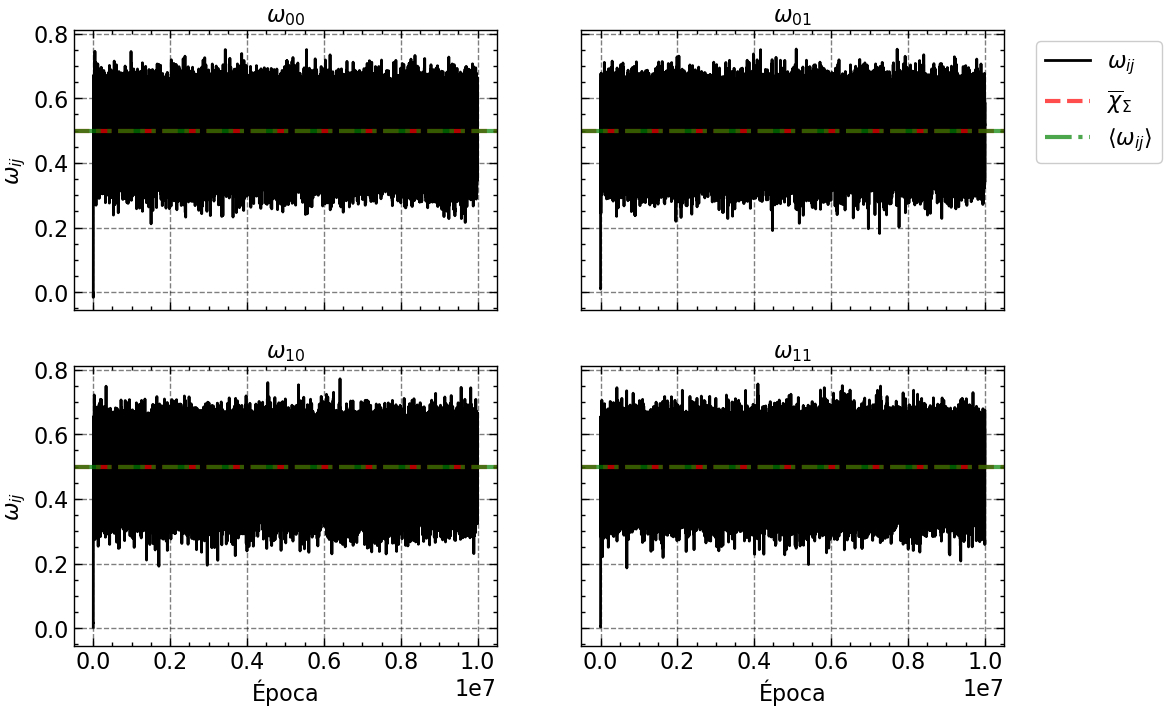

In [158]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
W_mean = W.mean(axis=0)

for i in range(W.shape[1]):
    ax[i//2, i%2].plot(W[:, i, 0], color='black')
    ax[i//2, i%2].axhline(sigma_evector[i, index_max], color='r', linestyle='--', lw=3,alpha=0.7)
    ax[i//2, i%2].axhline(W_mean[i, 0], color='g', linestyle='-.', label='mean', lw=3, alpha=0.7)
    index = f'{i//2}{i%2}'
    ax[i//2, i%2].set_title(rf'$\omega_{{{index}}}$')


    # ax[i//2, i%2].legend()

ax[0,1].legend([r'$\omega_{ij}$', r'$\overline{\chi}_\Sigma$', r'$\langle\omega_{ij}\rangle$'], bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1,0].set_xlabel('Época')
ax[1,1].set_xlabel('Época')
ax[0,0].set_ylabel('$\omega_{ij}$')
ax[1,0].set_ylabel('$\omega_{ij}$')

plt.savefig('../doc/figures/ej_1.pdf', dpi=500)